# A complete data analysis  for game ratings data.

In [26]:
# Project Setup and Data Loading ---
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv(r"C:\\Users\\HP\\Desktop\\game_eda\\game_ratings.csv")
df

,Game Name,Developer,Genre,Rating
0,Candy Crush Saga,King,Puzzle,4.6
1,Clash of Clans,Supercell,Strategy,4.5
2,Among Us,InnerSloth,Party,4.4
3,Pokémon GO,Niantic,Augmented Reality,4.3
4,PUBG Mobile,Tencent Games,Battle Royale,4.2
...,...,...,...,...
96,Stardew Valley,ConcernedApe,Simulation,4.7
97,Hades,Supergiant Games,Action,4.9
98,Plague Inc.,Ndemic Creations,Strategy,4.5
99,Alto's Adventure,Noodlecake Studios,Endless Runner,4.7


In [28]:
# Display a concise summary of the DataFrame
print("Initial DataFrame Info:")
df.info()

Initial DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Game Name  101 non-null    object 
 1   Developer  101 non-null    object 
 2   Genre      101 non-null    object 
 3   Rating     101 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [30]:
df.shape

(101, 4)

In [4]:
df.describe()

,Rating
count,101.000000
mean,4.398020
std,0.175488
min,4.100000
25%,4.300000
50%,4.400000
75%,4.500000
max,4.900000


In [5]:
print(df.dtypes)

Game Name     object
Developer     object
Genre         object
Rating       float64
dtype: object


In [6]:
# Data Cleaning and Preprocessing ---
print("Checking for missing values:")
print(df.isnull().sum())


print("Checking for duplicates:")
duplicate_rows = df.duplicated().sum()
if duplicate_rows > 0:
    print(f"Found {duplicate_rows} duplicate rows. Removing them.")
    df.drop_duplicates(inplace=True)
else:
    print("No duplicate rows found.")

Checking for missing values:
Game Name    0
Developer    0
Genre        0
Rating       0
dtype: int64
Checking for duplicates:
No duplicate rows found.


Descriptive statistics for Rating:
count    101.000000
mean       4.398020
std        0.175488
min        4.100000
25%        4.300000
50%        4.400000
75%        4.500000
max        4.900000
Name: Rating, dtype: float64


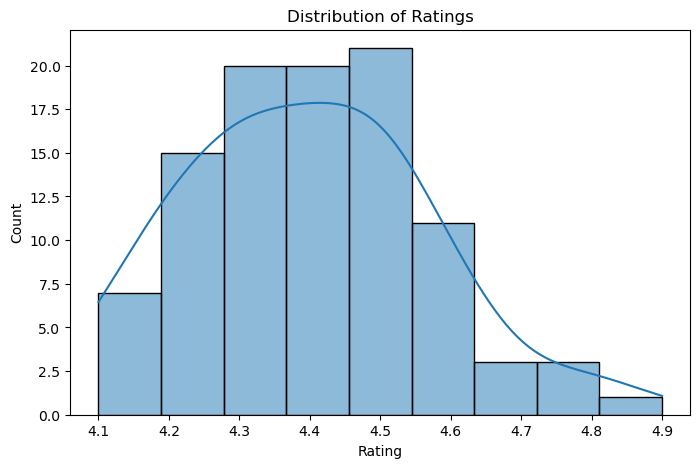

In [8]:
# Exploratory Data Analysis (EDA) and Visualization ---

print("Descriptive statistics for Rating:")
print(df['Rating'].describe())


# Distribution of `Rating`
plt.figure(figsize=(8, 5))
sns.histplot(df['Rating'], kde=True, bins=9)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

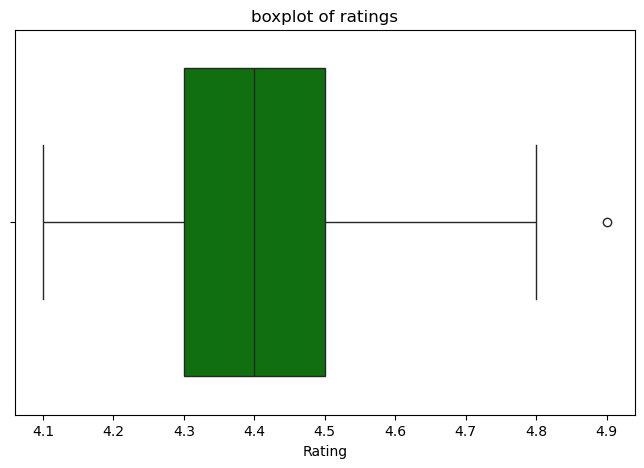

In [31]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Rating'],color="green")
plt.title("boxplot of ratings")
plt.show()

In [9]:
#top 5 heighst rated games
print(df.nlargest(5,'Rating'))

           Game Name         Developer       Genre  Rating
97             Hades  Supergiant Games      Action     4.9
14         Minecraft            Mojang     Sandbox     4.8
95   Monument Valley       Ustwo Games      Puzzle     4.8
100         The Room   Fireproof Games      Puzzle     4.8
7     Genshin Impact            miHoYo  Action RPG     4.7


In [10]:
# 5 lowest rated games
print(df.nsmallest(5,'Rating'))

            Game Name               Developer          Genre  Rating
6            Fortnite              Epic Games  Battle Royale     4.1
21        Hearthstone  Blizzard Entertainment           Card     4.1
39  State of Survival     KingsGroup Holdings       Strategy     4.1
41     Clash of Kings           Elex Wireless       Strategy     4.1
45   Forge of Empires               InnoGames       Strategy     4.1


In [11]:
avg_rating=df.groupby('Genre')['Rating'].mean().sort_values(ascending=False)
print(avg_rating)

Genre
Sandbox              4.650000
Action RPG           4.650000
Adventure            4.550000
Puzzle               4.515385
Virtual Pet          4.500000
Clicker              4.500000
Racing               4.460000
Sports               4.450000
Horror               4.450000
Endless Runner       4.425000
Action               4.420000
Arcade               4.420000
Casual               4.400000
Music                4.400000
Party                4.400000
Simulation           4.357143
RPG                  4.333333
Strategy             4.311765
Fighting             4.300000
Augmented Reality    4.300000
Shooter              4.300000
Battle Royale        4.200000
MOBA                 4.200000
Card                 4.100000
Name: Rating, dtype: float64


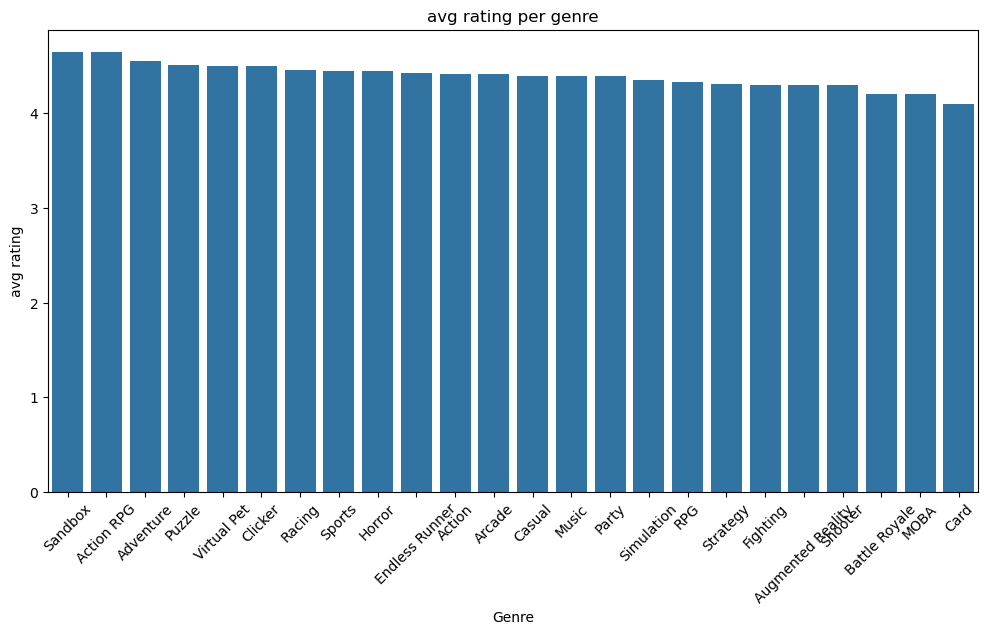

In [12]:
plt.figure(figsize=(12,6))
sns.barplot(x=avg_rating.index,y=avg_rating.values)
plt.xticks(rotation=45)
plt.title("avg rating per genre")
plt.ylabel("avg rating")
plt.show()

Genre
Strategy             17
Simulation           14
Puzzle               13
Arcade               10
RPG                   6
Racing                5
Action                5
Endless Runner        4
Sports                4
Battle Royale         3
Action RPG            2
Sandbox               2
MOBA                  2
Fighting              2
Adventure             2
Horror                2
Shooter               1
Card                  1
Augmented Reality     1
Party                 1
Music                 1
Clicker               1
Virtual Pet           1
Casual                1
Name: count, dtype: int64


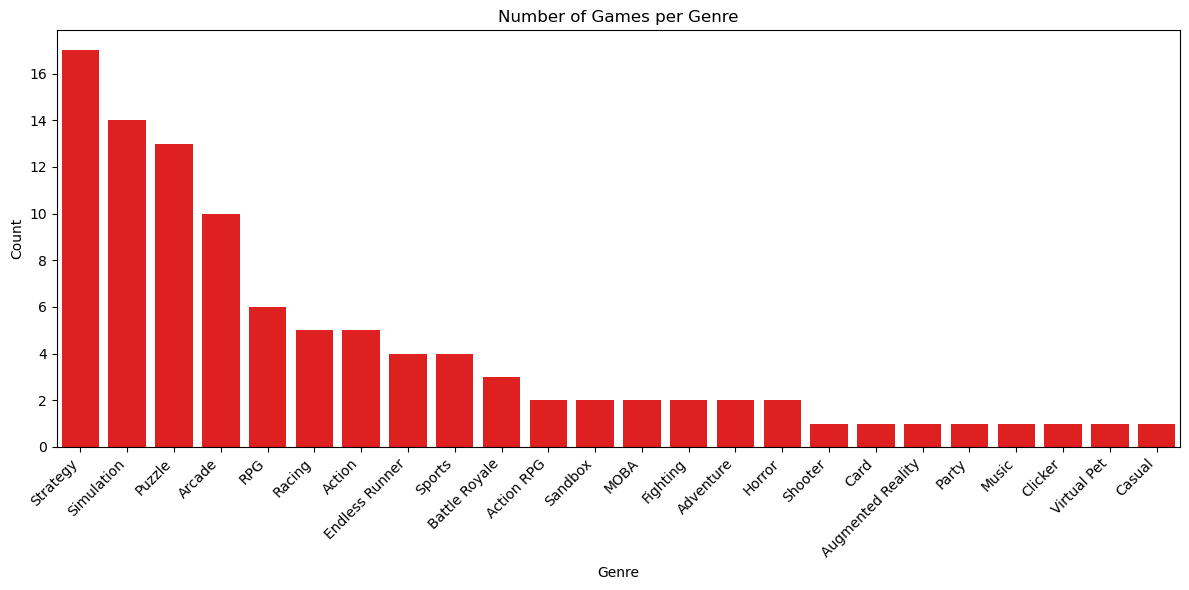

In [20]:
# Number of games per genre
genre_counts = df['Genre'].value_counts()
print(genre_counts)
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values,color='red')
plt.xticks(rotation=45, ha='right')
plt.title("Number of Games per Genre")
plt.ylabel("Count")
plt.xlabel("Genre")
plt.tight_layout()
plt.show()

In [19]:
game_count=df['Developer'].value_counts()
print(game_count)

Developer
Supercell              5
Electronic Arts        4
Rovio Entertainment    3
King                   2
Halfbrick Studios      2
                      ..
Gameloft SE            1
Lima Sky LLC           1
Scopely                1
Super Evil Megacorp    1
Fireproof Games        1
Name: count, Length: 81, dtype: int64
